In [1]:
import sys
sys.path.append('../../src')

from TrafficLight import PeriodicTrafficLight, AdaptiveTrafficLight, TrafficLightMirror
import Model1
import Model2
from ModelEvaluation import Evaluator, MultiEvaluator
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import pickle
import math

In [2]:
output_path = '../../data/'

*Periodic traffic lights*

In [3]:
periodic_ew = PeriodicTrafficLight()
periodic_ew.initialize(period=30, time_delay=0)

periodic_ns = TrafficLightMirror()
periodic_ns.initialize(traffic_light=periodic_ew)

*Adaptive traffic lights*

In [4]:
adaptive1_ew = AdaptiveTrafficLight()
adaptive1_ew.initialize(sensor_depth=8, rule=1)

adaptive1_ns = TrafficLightMirror()
adaptive1_ns.initialize(traffic_light=adaptive1_ew)

In [5]:
adaptive2_ew = AdaptiveTrafficLight()
adaptive2_ew.initialize(sensor_depth=8, rule=2)

adaptive2_ns = TrafficLightMirror()
adaptive2_ns.initialize(traffic_light=adaptive2_ew)

In [6]:
adaptive3_ew = AdaptiveTrafficLight()
adaptive3_ew.initialize(sensor_depth=8, rule=3)

adaptive3_ns = TrafficLightMirror()
adaptive3_ns.initialize(traffic_light=adaptive3_ew)

*Single four-way intersection*

In [7]:
nonhom = lambda t: 0.2/2*math.cos(2*math.pi/43200*t)+0.2/2+0.05
hom = lambda t: 0.2
standard = [1.]
compound = [0.6,0.2,0.1,0.05,0.05]

In [8]:
standard_nonhom_network = Model1.IntersectionNetworkSimulator()
standard_nonhom_network.initialize(grid_dimensions=(1,1))
standard_nonhom_network.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=0.5, arrival_rate_n=nonhom, arrival_rate_e=nonhom, arrival_rate_s=nonhom, arrival_rate_w=nonhom, platoon_size_distribution=standard)
#standard_nonhom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
standard_nonhom_network.set_observable_intersections(grid_inds=[(0,0)])

In [9]:
standard_hom_network = Model1.IntersectionNetworkSimulator()
standard_hom_network.initialize(grid_dimensions=(1,1))
standard_hom_network.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=0.5, arrival_rate_n=hom, arrival_rate_e=hom, arrival_rate_s=hom, arrival_rate_w=hom, platoon_size_distribution=standard)
#standard_hom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
standard_hom_network.set_observable_intersections(grid_inds=[(0,0)])

In [10]:
compound_nonhom_network = Model1.IntersectionNetworkSimulator()
compound_nonhom_network.initialize(grid_dimensions=(1,1))
compound_nonhom_network.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=0.5, arrival_rate_n=nonhom, arrival_rate_e=nonhom, arrival_rate_s=nonhom, arrival_rate_w=nonhom, platoon_size_distribution=compound)
#compound_nonhom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
compound_nonhom_network.set_observable_intersections(grid_inds=[(0,0)])

In [11]:
compound_hom_network = Model1.IntersectionNetworkSimulator()
compound_hom_network.initialize(grid_dimensions=(1,1))
compound_hom_network.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=0.5, arrival_rate_n=hom, arrival_rate_e=hom, arrival_rate_s=hom, arrival_rate_w=hom, platoon_size_distribution=compound)
#compound_hom_network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
compound_hom_network.set_observable_intersections(grid_inds=[(0,0)])

In [37]:
network = standard_hom_network
light_ns, light_ew = adaptive1_ns, adaptive1_ew
network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)

In [38]:
network = network.reset()
network.simulate(delta_t=0.1, end_time=1200, animate=False, fig_width=4, output_destination="../../data/vids/", file_name="simulation_1x1.mp4", speed=1)

In [39]:
stats = network.get_stats()
print("Average wait time:", stats[(0,0)]["N"]["wait_time"], "s")
print("Average queue length: ", stats[(0,0)]["N"]["avg_queue_length"], "vehicles")

Average wait time: 1.5605150214592256 s
Average queue length:  0.4195 vehicles


In [40]:
print("Average wait time:", stats[(0,0)]["W"]["wait_time"], "s")
print("Average queue length: ", stats[(0,0)]["W"]["avg_queue_length"], "vehicles")

Average wait time: 1.5561403508771914 s
Average queue length:  0.3905 vehicles


In [41]:
(stats[(0,0)]["N"]["wait_time"]+stats[(0,0)]["E"]["wait_time"]+stats[(0,0)]["W"]["wait_time"]+stats[(0,0)]["S"]["wait_time"])/4

1.6509573183089512

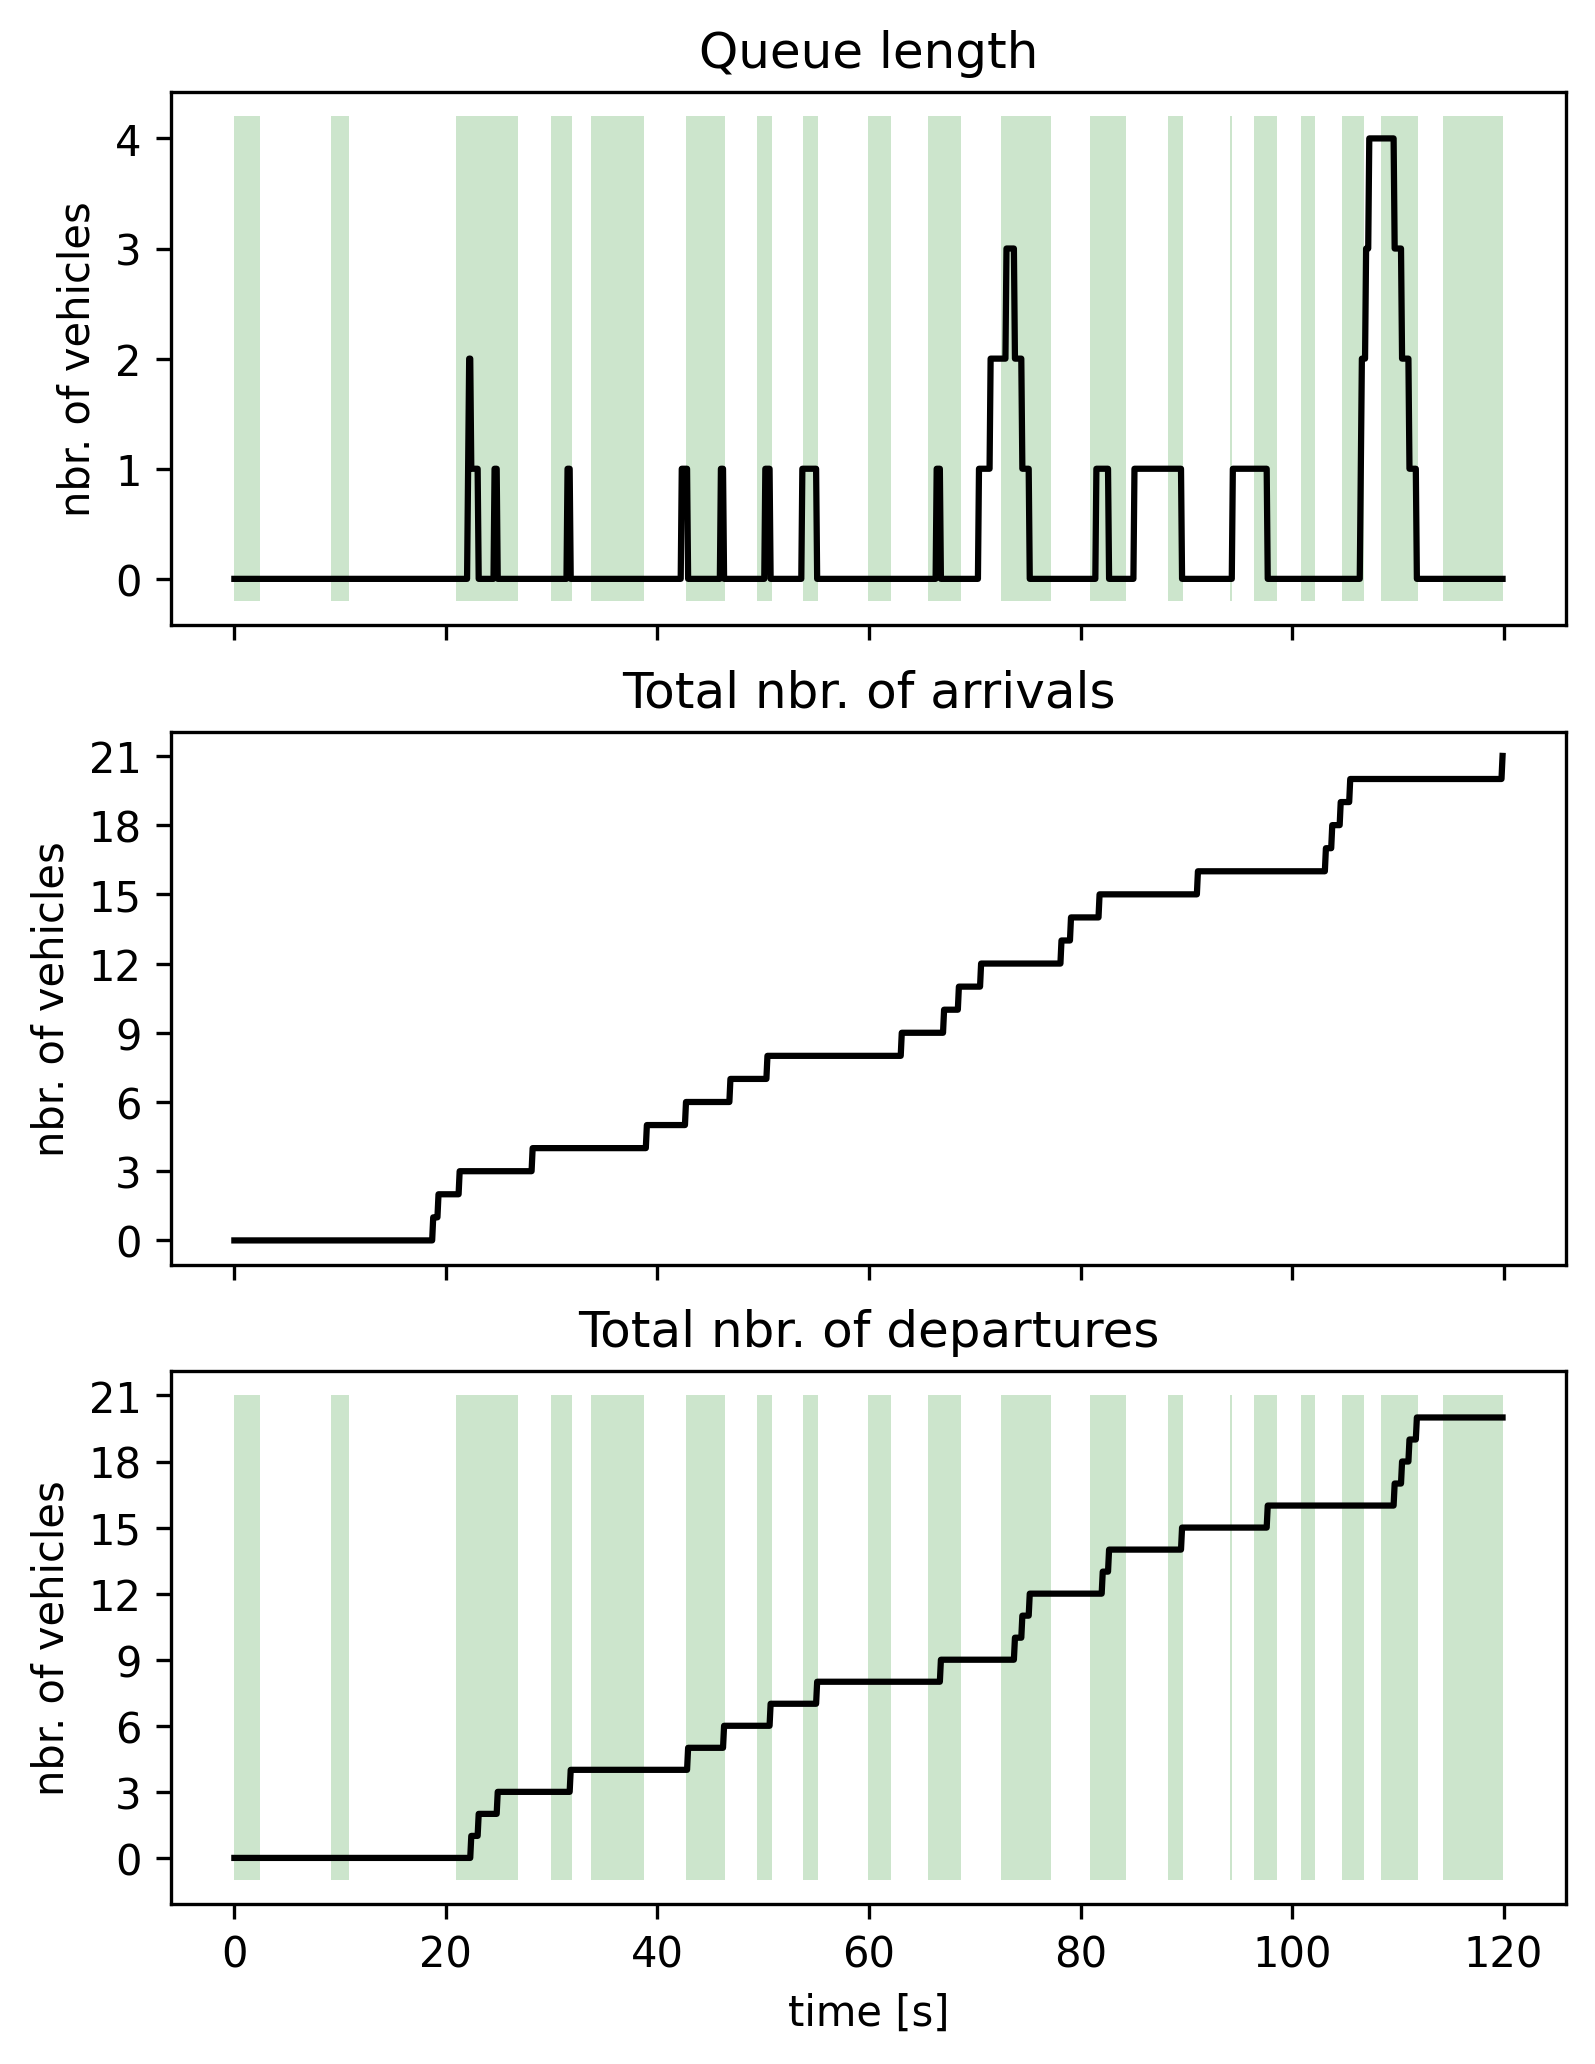

In [59]:
fig, axs = network.plot_queue_stats(plt=plt, grid_ind=(0,0), direction='W', end_time=120, delta_t=0.1, traffic_light=light_ew,fig_size=(6,8))
#plt.savefig(output_path+'figs/eastbound_(0,0)', bbox_inches='tight')